# Investigate Titanic Passenger's Survival Factors

RMS Titanic (/taɪˈtænɪk/) was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 

Source: https://en.wikipedia.org/wiki/RMS_Titanic

Based on '**titanic-data.csv**', I'd like to propose the following questions concerning survival factors. 

* Is age a factor? 
  * Children under 10 years old
  * Children between 10 and 15 years old
  * People over 60 years old
* Is fare class a factor? 
* Is gender a factor?
* What is the likely social economic status of the emarked ports?
(C = Cherbourg, Q = Queenstown, S = Southampton)
  * and their survival rate (see which port has the luck charm)
  
*This data set is not complete, only contains 891 records. Therefore the conclusion may not reflect the entire population. In the end of the analysis, I will introduce the full Titanic data set to conduct null hypothesis to see whether this sample is significant different from the population. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv('titanic-data.csv')

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the **Survived** column, the mean of survival rate is **0.38**, standard deviation is **0.49**, one std above mean is **0.87**, and one std below mean is **-0.11**. 

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Cleaning 

In [137]:
#titanic.loc[:,titanic.isnull().any()]

In [55]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
titanic.dropna()

Based on this, we can see there's 3 columns with NaN values. As for "Embarked" column, I'd like to see who is missing to have a better idea.

In [58]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [71]:
titanic[titanic['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


After some Google search, I found out Miss. Icard was a maid to Mrs. George Nelson Stone. Both of them boarded Titanic at Southampton port.

Source: https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

In [74]:
titanic.loc[61, "Embarked"] = 'S'
titanic.loc[829, "Embarked"] = 'S'

In [79]:
titanic[titanic['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


All data looks good to go. Let's start the analysis!

### Social Economic Status of Embarked Port

In [67]:
embarked_total = titanic.groupby('Embarked')['PassengerId'].count()
print(embarked_total.values)

[168  77 644]


In [100]:
my_colors = 'rgbkymc'

titanic.groupby('Embarked')['PassengerId'].count().plot(kind='bar', color = my_colors)
plt.xaxis=(['Corn', 'Queen', 'Southampton'])
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passenger')
plt.title('Titanic Passenger Embarked Port Count')
plt.show()

TypeError: 'str' object is not callable

In [14]:
titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Based on the data set, there were 168 passengers from Cherbourg, 77 from Queenstown, 644 from Southampton. Surprisingly, Passengers from Cherbourg has a higher survival rate. Let's digg deeper into why Cherbourg has a better survival rate. 

In [16]:
titanic.groupby(['Embarked', 'Pclass'])['PassengerId'].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: PassengerId, dtype: int64

Based on the class chart, Cherbourg and Queenstown has relative smaller population. Southampton is more likely a major port with large population based on the large number of passenber across all classes. Queenstown is likely a working class city with most of its passengers in 3rd class. Cherbourg is likely a mid size city with high percentage of wealthy population. 

### Passenger Survival Rate Based on Class

In [59]:
titanic.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [10]:
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [129]:
titanic.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

### Chi-Square Test of Independence

Since I'd like to know whether the fare class is related to - or independent of survival variable. Chi-Square test of independence fits the criteria. 

Null Hypothesis: There is no significant relationship (independent) between different fare classes.

Alternative Hypothesis: There is significant relationship (dependent) between different fare classes.

Significance level: 0.05

From above calculated date for the number of survival of each class. I plugged in the data to this [Chi-Square Calculator](http://www.socscistatistics.com/tests/chisquare2/Default2.aspx) and got the following result: 

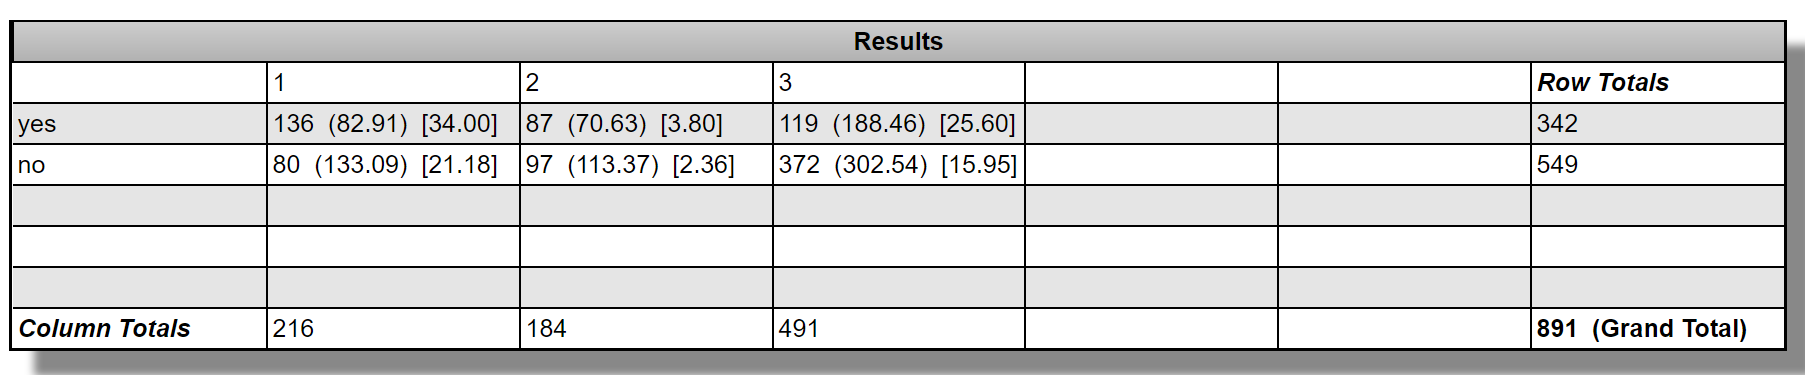

**Conclusion**: The chi-square statistic is 102.889. The p-value is < 0.00001. The result is significant at p < .05. Therefore I will reject the null hypothesis. There is significant relationship between fare class and survival rate. 

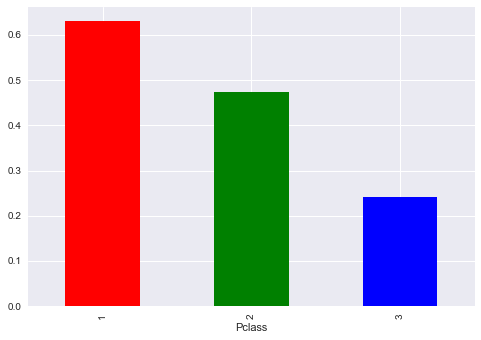

In [104]:
titanic.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=my_colors)
plt.xlabel("Fare Class")
plt.ylabel("Survival Rate")
plt.title("Titanic Survival Rate by Fare Class")
plt.show()

Based on this calculation, the **1st class** has 62% survival rate, **2nd class** with 47%, and **3rd class** with only 24%, which is less than half of the 1st class. 

**Conclusion**: the higher fare class has better survival rate. 

### Embarked Origin Lucky Charm Factor on Survival Rate 

In [18]:
titanic.groupby(['Embarked', 'Pclass'])['Survived'].mean()

Embarked  Pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64

Based on the survival rate, it falls inline with the earlier analysis. Te higher fare class has a better chance of survival regardless of embarked port. 

### Gender Factor on Survival Rate

In [19]:
titanic.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

On Titanic, the female passenger has a way higher survival rata than male counterpart. Is it the same among all classes? 

In [132]:
titanic.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [133]:
titanic.groupby(['Sex'])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

### Chi-Square Test of Independence

Since I'd like to know whether gender is related to - or independent of the survival variable. Chi-Square test of independence fits the criteria. 

Null Hypothesis: There is no significant relationship (independent) between different gender.

Alternative Hypothesis: There is significant relationship (dependent) between different gender.

Significance level: 0.05

From above calculated date for the number of survival of each class. I plugged in the data to this [Chi-Square Calculator](http://www.socscistatistics.com/tests/chisquare2/Default2.aspx) and got the following result: 

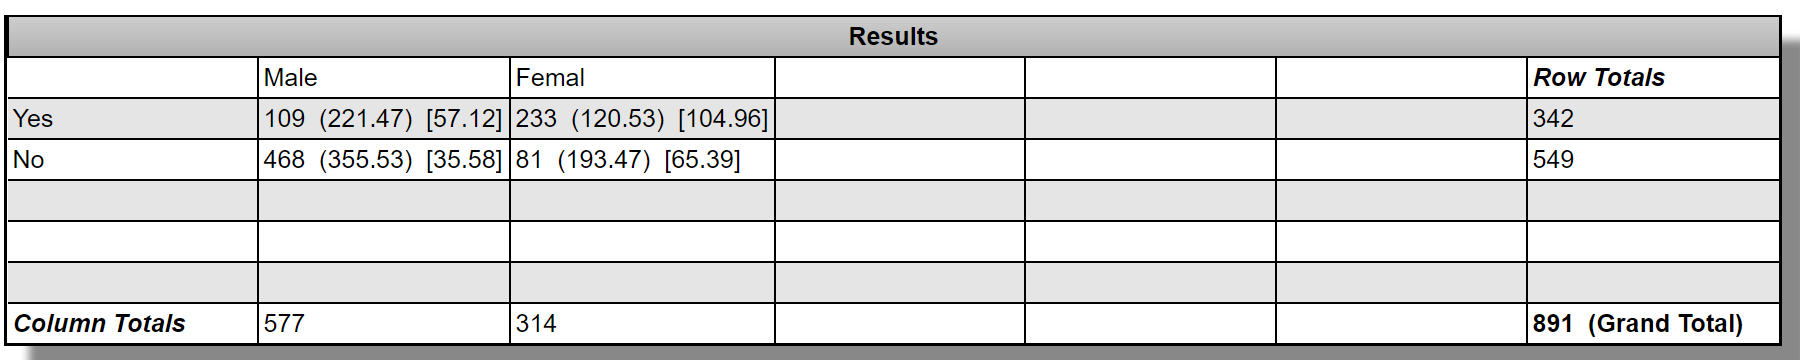

**Conclusion**: The chi-square statistic is 263.0506. The p-value is < .00001. The result is significant at p < .05. Therefore I rejected the null hypothesis. There is a significant relationship between gender and survival rate. 

In [20]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

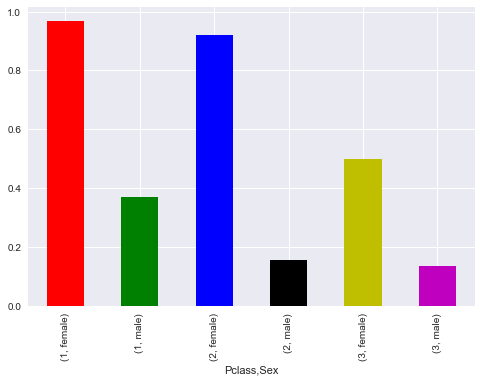

In [128]:
titanic.groupby(['Pclass', 'Sex',])['Survived'].mean().plot(kind='bar', color=my_colors)
plt.xlabel('Gender and Fare Class')
plt.ylabel('Survival Rate')
plt.title('Gender Factor on Survival Rate')
plt.show()

The class still plays a factor in survival rate, even though female from 3rd class has a relative higher survival rate than male from same class. 

### Age Factor on Survival Rate

Let's first create new series represent '*Under 10 Years Old*'.   

In [22]:
under10 = (titanic['Age'] < 10).map({True:'under 10', False:'over 10'})

In [107]:
under10_survived_1 = titanic.groupby(under10)['Survived'].mean()
print(under10_survived_1)

Age
over 10     0.366707
under 10    0.612903
Name: Survived, dtype: float64


In [135]:
titanic.groupby(under10)['Survived'].sum()

Age
over 10     304
under 10     38
Name: Survived, dtype: int64

In [136]:
titanic.groupby(under10)['Survived'].count()

Age
over 10     829
under 10     62
Name: Survived, dtype: int64

### Chi-Square Test of Independence

Since I'd like to know whether age is related to - or independent of the survival variable. Chi-Square test of independence fits the criteria. 

Null Hypothesis: There is no significant relationship (independent) between different age(under 10).

Alternative Hypothesis: There is significant relationship (dependent) between different age(under 10).

Significance level: 0.05

From above calculated date for the number of survival of each class. I plugged in the data to this [Chi-Square Calculator](http://www.socscistatistics.com/tests/chisquare2/Default2.aspx) and got the following result: 

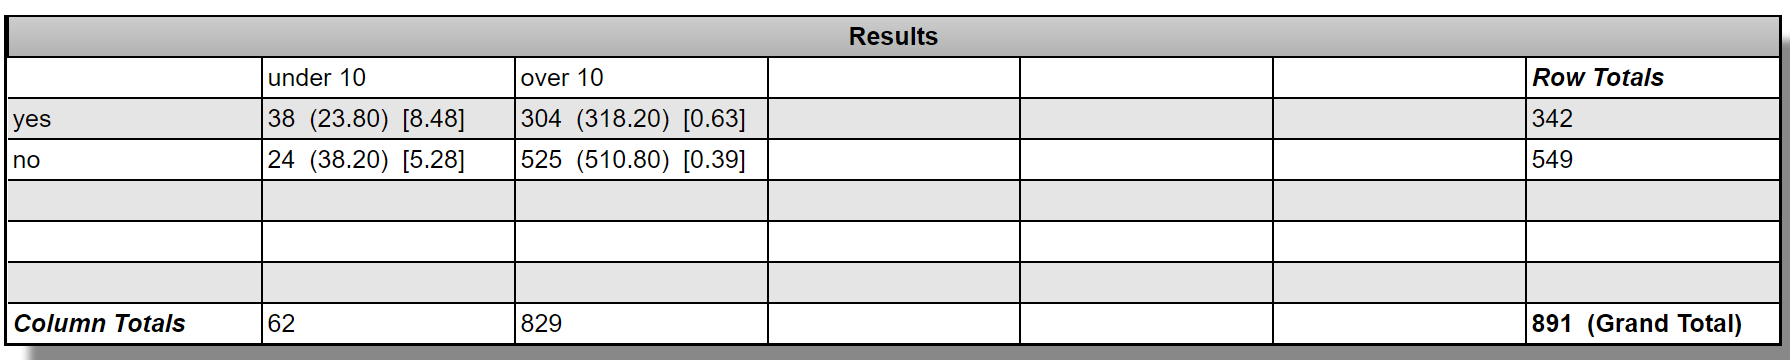

**Conclusion**: The chi-square statistic is 14.7839. The p-value is .000121. The result is significant at p < .05. Therefore I rejected the null hypothesis. There is a significant relationship between "under 10" and survival rate. 

In [27]:
under10_survived_2 = titanic.groupby([under10, 'Pclass'])['Survived'].mean()
print(under10_survived_2)

Age       Pclass
over 10   1         0.629108
          2         0.419162
          3         0.222717
under 10  1         0.666667
          2         1.000000
          3         0.452381
Name: Survived, dtype: float64


In [109]:
under10_survived_1_iteritems = under10_survived_1.iteritems()
print(under10_survived_1_iteritems)

Based on the analysis, passengers under 10 years ago has a higher survival rate than older passengers. Though 1st class's younger passengers does not have a much higher rate than others in same class. 

In [28]:
over60 = (titanic['Age'] > 60).map({True:'over 60', False:'under 60'})

In [29]:
over60_survived_1 = titanic.groupby(over60)['Survived'].mean()
print(over60_survived_1)

Age
over 60     0.227273
under 60    0.387802
Name: Survived, dtype: float64


In [31]:
over60_survived_2 = titanic.groupby([over60, 'Pclass'])['Survived'].mean()
print(over60_survived_2)

Age       Pclass
over 60   1         0.214286
          2         0.333333
          3         0.200000
under 60  1         0.658416
          2         0.475138
          3         0.242798
Name: Survived, dtype: float64


On the contrary, the older passenger is less likely to survive among all classes.

In [37]:
teenager = np.where((titanic['Age'] < 20) & (titanic['Age'] > 10),'Teenager','Not Teenager')

In [39]:
teenager_survived = titanic.groupby([teenager, 'Pclass'])['Survived'].mean()
print(teenager_survived)

              Pclass
Not Teenager  1         0.611111
              2         0.469880
              3         0.238876
Teenager      1         0.833333
              2         0.500000
              3         0.265625
Name: Survived, dtype: float64


From the analysis, teenager survival rate is not particalur different from other adult. Maybe back in the day, teenager was already considered adult. Therefore, they did not get preferential treatment for the life boat. 

## Z-Score Test

As I indicated in the beginning of the report, this titanic dataset is only a sample. Whether my finding is reflective of the population(all titanic passenger) is unknown. Therefore, I located the full Titanic dataset. 

Source: https://www.kaggle.com/c/titanic/data

Since I have both the population and sample parameter, Z-Score test is applicable here.

H0: mu = mu1

Ha: mu != mu1

**Null hypothesis**: mu(population) is not significant different from mu1(sample)

**Alternative hypothesis**: mu(population) is significant different from mu1(sample)

In [112]:
titanic_full = pd.read_csv('titanic-full.csv')
titanic_full.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [114]:
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [116]:
titanic_full.dropna()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [119]:
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [117]:
titanic_full.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [118]:
titanic_full['survived'].describe()

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64

In [124]:
mean_pop = titanic_full['survived'].mean()
std_pop = titanic_full['survived'].std(ddof=0)
mean_sample = titanic['Survived'].mean()
std_sample = titanic['Survived'].std(ddof=1)
sample_size = titanic['Survived'].count()

In [125]:
print('Population Mean: ', mean_pop)
print('Sample Mean: ', mean_sample)
print('Population Standard Deviation: ', std_pop)
print('Sample Standard Deviation: ', std_sample)
print('Sample Size:', sample_size)

Population Mean:  0.3819709702062643
Sample Mean:  0.3838383838383838
Population Standard Deviation:  0.4858694764295724
Sample Standard Deviation:  0.4865924542648585
Sample Size: 891


In [127]:
standard_error = std_pop / np.sqrt(sample_size)
z_score = (mean_sample - mean_pop) / standard_error

print('Standard Error: ', standard_error)
print('Z-Score: ', z_score)

Standard Error:  0.0162772399031
Z-Score:  0.114725447511


From the Z-Table, I found with z-score at 0.11, the probability is **0.54**, it does not fall in the critical region of 95%. Therefore, I retain the **Null Hypothesis**. The sample and population has no significant difference. I'd like to think the large sample size is one major factor for this conclusion.  

## Conclusion

Based on the series of analysis, there are few factors that could have impacted the survival rate of the passengers on Titanc, such as gender, fare class, and age. But I can not reach the conclusion that these are the cause of survival, since there is always lurking variable which can not be ruled out. 

With Z-Score test, I can confidently say the sample data is representative of the entire population. Therefore, the finding in sample can be applied to population. 

### Additional reading: 

One possible lurking variable: location of passenger on ship

[Wikipdia: Lifeboat of Titanic](https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic#Lack_of_lifeboats_and_training)

> Smith had ordered his officers to put the "women and children in and lower away".[27] However, Murdoch and Lightoller both interpreted the evacuation order differently; Murdoch interpreted it as women and children first, while Lightoller interpreted it as women and children only. Lightoller lowered lifeboats with empty seats if there were not any women and children waiting to board, while Murdoch only allowed a limited number of men to board if all the nearby women and children had already embarked. This had a significant effect on the survival rates of the men aboard Titanic, whose chances of survival came to depend on which side of the ship they tried to find lifeboat seats.[28]